In [10]:
import matplotlib.pyplot as plt
import os, re
import pandas as pd
from functools import reduce
from utils import *


In [11]:
# Folder containing the CSVs
folder_path = "../data/07_llm_ratings_reversed/"

# List all CSV files in the folder
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv") and f.startswith("corrected")])
csv_files[:3]

['corrected_transcripts_gemini1.5flash_slice#0.01_prompt#1_rating.csv',
 'corrected_transcripts_gemini1.5flash_slice#0.01_prompt#2_rating.csv',
 'corrected_transcripts_gemini1.5flash_slice#0.01_prompt#3_rating.csv']

In [12]:
# Read and process each CSV file
dfs = []
for file in csv_files:
    # Read the CSV into a dataframe
    file_to_load = folder_path+file
    df = pd.read_csv(file_to_load)
    
    # Create a new column name for the rating column using the file's name (excluding .csv)
    new_rating_col = ".".join(file.split('.')[:-1])#+ "_rating"
    
    # Rename the 'rating' column to the new name
    df = df.rename(columns={"rating": new_rating_col})
    dfs.append(df)

# Merge all dataframes on the "name" column using an outer join (to keep all rows)
merged_df = reduce(lambda left, right: pd.merge(left, right, on="name", how="outer"), dfs)
merged_df.head()

,name,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#4_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#5_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#4_rating,...,corrected_transcripts_gpt4omini_slice#0.75_prompt#1_rating,corrected_transcripts_gpt4omini_slice#0.75_prompt#2_rating,corrected_transcripts_gpt4omini_slice#0.75_prompt#3_rating,corrected_transcripts_gpt4omini_slice#0.75_prompt#4_rating,corrected_transcripts_gpt4omini_slice#0.75_prompt#5_rating,corrected_transcripts_gpt4omini_slice#1.0_prompt#1_rating,corrected_transcripts_gpt4omini_slice#1.0_prompt#2_rating,corrected_transcripts_gpt4omini_slice#1.0_prompt#3_rating,corrected_transcripts_gpt4omini_slice#1.0_prompt#4_rating,corrected_transcripts_gpt4omini_slice#1.0_prompt#5_rating
0,SUB001_SPEECH001,1,1,2,4,1,3,4,3,3,...,4,4,4,4,4,4,4,4,3,5
1,SUB002_SPEECH001,2,2,2,2,1,3,3,3,3,...,4,4,4,5,5,5,4,4,4,4
2,SUB003_SPEECH001,3,3,2,2,3,4,4,3,4,...,3,3,4,3,4,4,3,4,4,4
3,SUB005_SPEECH001,2,2,2,2,1,3,2,3,2,...,3,3,4,3,4,4,3,4,3,4
4,SUB005_SPEECH002,2,2,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,4,4,4


In [13]:
mean_df = merged_df.set_index(merged_df.columns[0]).mean(axis=1).reset_index()
mean_df.columns = ["Speech", "Mean_Score"]
mean_df.to_csv('../data/07_llm_ratings_reversed/averaged_llm_ratings_reversed.csv')

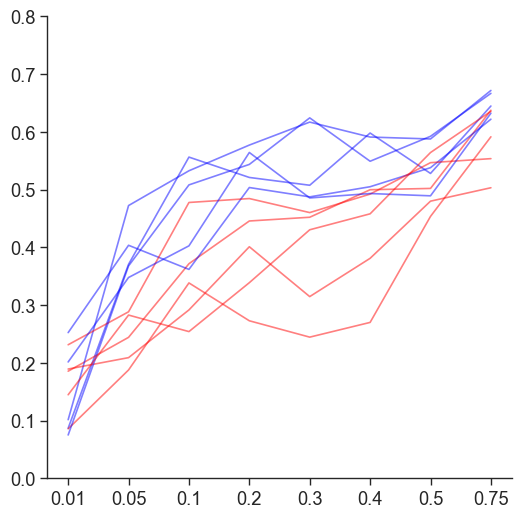

In [14]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.5)
prompt_list = ["prompt#1", "prompt#2", "prompt#3", "prompt#4", "prompt#5"]
tick_list = ['0.01', '0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.75']


result_gpt = []
result_gemini = []


fig, ax = plt.subplots(figsize = (6, 6))  # Create figure and axis

for current_prompt in prompt_list:
    #print(current_prompt)
    df_filtered         = filter_columns(merged_df, "gpt4", current_prompt)
    df_sorted           = sort_columns_by_slice(df_filtered)
    df_correlations     = df_sorted.corr()
    plt.plot(df_correlations.iloc[0,1:].values, color = 'blue', alpha = .5);
    result_gpt.append(df_correlations.iloc[0,1:].values)

    df_filtered         = filter_columns(merged_df, "gemini", current_prompt)
    df_sorted           = sort_columns_by_slice(df_filtered)
    df_correlations     = df_sorted.corr()
    plt.plot(df_correlations.iloc[0,1:].values, color = 'red', alpha = .5); 
    result_gemini.append(df_correlations.iloc[0,1:].values)

plt.ylim([0, 0.8])
tick_positions = range(len(tick_list))  # Ensure correct tick locations
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_list)  # Ensure labels match positions
sns.despine()
plt.show()



In [15]:
result_gpt

[array([0.08710366, 0.37082556, 0.55648764, 0.5212399 , 0.50774316,
        0.59816665, 0.52820323, 0.64490687]),
 array([0.10180985, 0.47257897, 0.53280915, 0.57730627, 0.61711476,
        0.59120386, 0.58788792, 0.67187287]),
 array([0.25257603, 0.40378833, 0.36201206, 0.50379866, 0.48761928,
        0.50518524, 0.53815734, 0.62209647]),
 array([0.20177659, 0.34799697, 0.40280842, 0.56447931, 0.48573656,
        0.49341126, 0.48943117, 0.63247528]),
 array([0.07533859, 0.36800989, 0.50834888, 0.54382843, 0.62440797,
        0.54931168, 0.59249615, 0.66686606])]

In [16]:
import numpy as np
result_gpt = np.asarray(result_gpt)
result_gemini = np.asarray(result_gemini)
result_gemini.shape

(5, 8)

In [17]:
df = pd.DataFrame(np.vstack((result_gpt, result_gemini)), columns = tick_list)
df['models'] = ['GPT','GPT','GPT','GPT','GPT','Gemini','Gemini','Gemini','Gemini','Gemini']
df['prompts'] = ['Prompt#1', 'Prompt#2','Prompt#3','Prompt#4','Prompt#5','Prompt#1', 'Prompt#2','Prompt#3','Prompt#4','Prompt#5']

In [23]:
averages = df.mean(numeric_only=True)
averages

0.01    0.155640
0.05    0.317627
0.1     0.409702
0.2     0.465455
0.3     0.462568
0.4     0.483945
0.5     0.528360
0.75    0.616046
dtype: float64

In [24]:
# Re-create DataFrame from provided data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define column names
columns = ["0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5", "0.75", "models", "prompts"]


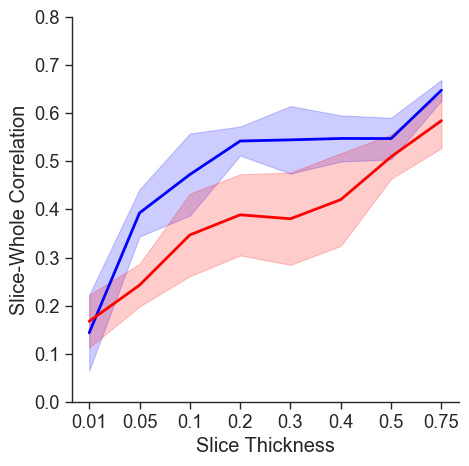

In [26]:

# Convert accuracy columns to float (excluding 'models' and 'prompts')
accuracy_columns = columns[:-2]
df[accuracy_columns] = df[accuracy_columns].astype(float)

# Compute mean and standard deviation for each model
df_mean = df.groupby("models")[accuracy_columns].mean()
df_std = df.groupby("models")[accuracy_columns].std()

# Define colors for models
colors = {"GPT": "blue", "Gemini": "red"}

# Plot shaded lines
plt.figure(figsize=(5, 5))
for model in df_mean.index:
    means = df_mean.loc[model]
    stds = df_std.loc[model]
    color = colors.get(model, "gray")

    # Plot mean line
    plt.plot(means.index, means, label=model, color=color, linewidth=2)
    
    # Add shaded region for standard deviation
    plt.fill_between(means.index, means - stds, means + stds, color=color, alpha=0.2)

# Formatting
plt.xlabel("Slice Thickness")
plt.ylabel("Slice-Whole Correlation")
#plt.title("Progression by Slice Thickness and Model Condition")
#plt.legend()

plt.ylim([0, 0.8])
tick_positions = range(len(tick_list))  # Ensure correct tick locations
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_list)  # Ensure labels match positions
sns.despine()
plt.show()
